In [18]:
import os.path
import numpy as np
import math
import matplotlib.pyplot as plt
from cavityclass import *

LAM = 1064*10**(-7) * 1.15

save_path = 'C:/Users/R&D Group/Python/kwabsim-master/'
file_name = 'datatest'
file_path = os.path.join(save_path, file_name+".dat")

In [19]:
ds28 = Cavity(file_path, LAM)
print(ds28.cavity)

[['M', 0.0], ['D', 15.0], ['Cx', 200.0], ['D', 15.0], ['M', -100.0], ['D', 3.5], ['L', 19.0], ['D', 3.5], ['M', -100.0], ['D', 8.5], ['L', 35.0], ['D', 2.5], ['Cy', 130.0], ['D', 22.5], ['M', 0.0]]


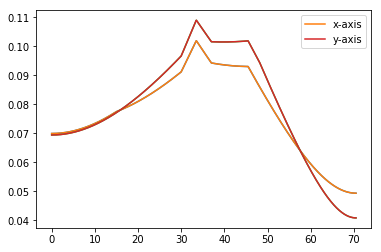

In [20]:
ds28.plot_waist_XY(1000)
plt.legend()
plt.show()

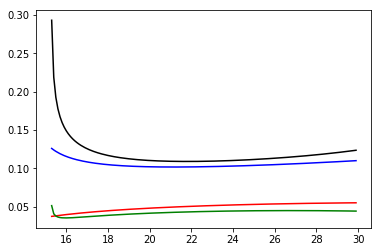

In [23]:
Wx_at_THG = []
Wx_at_V = []
Wy_at_THG = []
Wy_at_V = []
Z = []
for i in np.arange(10,30,.1):
    newcav = ds28.remove_optic(14).insert_optic('D',i,14)
    xcav = newcav.get_x_cav()
    ycav = newcav.get_y_cav()
    if xcav.is_stable and ycav.is_stable:
        Wx_at_THG.append(xcav.waist(xcav.L - 4))
        Wx_at_V.append(xcav.waist(33.5))
        Wy_at_THG.append(ycav.waist(ycav.L - 4))
        Wy_at_V.append(ycav.waist(33.5))
        Z.append(i)                   
plt.plot(Z, Wx_at_THG, 'r')
plt.plot(Z, Wx_at_V, 'b')
plt.plot(Z, Wy_at_THG, 'g')
plt.plot(Z, Wy_at_V, 'k')
plt.legend()
plt.show()

In [24]:
wV = min(W_at_V)
index_V = W_at_V.index(wV)
wT = min(W_at_THG)
index_T = W_at_THG.index(wT)

print('|Distance|','|Vanadate|', '|Thg|')
print(Z[index_V], wV, W_at_THG[index_V])
print(Z[index_T],  W_at_V[index_T], wT)

ValueError: min() arg is an empty sequence